In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Use DecisionTreeRegressor for regression task
regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.28623579601385674


In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0427
mean texture: 0.0073
mean perimeter: 0.0294
mean area: 0.0378
mean smoothness: 0.0062
mean compactness: 0.0127
mean concavity: 0.0568
mean concave points: 0.1262
mean symmetry: 0.0048
mean fractal dimension: 0.0018
radius error: 0.0174
texture error: 0.0038
perimeter error: 0.0064
area error: 0.0310
smoothness error: 0.0059
compactness error: 0.0035
concavity error: 0.0072
concave points error: 0.0081
symmetry error: 0.0045
fractal dimension error: 0.0029
worst radius: 0.1262
worst texture: 0.0123
worst perimeter: 0.1355
worst area: 0.1049
worst smoothness: 0.0139
worst compactness: 0.0134
worst concavity: 0.0445
worst concave points: 0.1148
worst symmetry: 0.0113
worst fractal dimension: 0.0067


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", dt_mse)


Random Forest MSE: 0.03622865497076024
Decision Tree MSE: 0.07017543859649122


In [24]:
rf_oob = RandomForestClassifier(oob_score=True)
rf_oob.fit(X_train, y_train)

print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9547738693467337


In [26]:
from sklearn.svm import SVC

bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10)
bag_svm.fit(X_train, y_train)

print("Bagging SVM Accuracy:", bag_svm.score(X_test, y_test))


Bagging SVM Accuracy: 0.9181286549707602


In [27]:
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    print(f"{n} trees: Accuracy = {rf.score(X_test, y_test):.4f}")


10 trees: Accuracy = 0.9415
50 trees: Accuracy = 0.9532
100 trees: Accuracy = 0.9591
200 trees: Accuracy = 0.9474


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load and split dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling
pipeline = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        estimator=LogisticRegression(max_iter=5000),
        n_estimators=10,
        random_state=42
    )
)

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, y_prob))


AUC Score: 0.9973544973544973


In [31]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

for name, importance in zip(data.feature_names, rf_reg.feature_importances_):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0021
mean texture: 0.0184
mean perimeter: 0.0037
mean area: 0.0025
mean smoothness: 0.0020
mean compactness: 0.0014
mean concavity: 0.0075
mean concave points: 0.2942
mean symmetry: 0.0031
mean fractal dimension: 0.0021
radius error: 0.0071
texture error: 0.0029
perimeter error: 0.0032
area error: 0.0150
smoothness error: 0.0035
compactness error: 0.0027
concavity error: 0.0057
concave points error: 0.0022
symmetry error: 0.0051
fractal dimension error: 0.0086
worst radius: 0.0479
worst texture: 0.0248
worst perimeter: 0.1070
worst area: 0.0826
worst smoothness: 0.0056
worst compactness: 0.0018
worst concavity: 0.0189
worst concave points: 0.3107
worst symmetry: 0.0035
worst fractal dimension: 0.0042


In [ ]:
Accuracy without scaling: 1.00, with scaling: 1.00
In this case, feature scaling did not affect accuracy, but it can significantly impact other datasets, especially with RBF or Polynomial kernels.



In [33]:
bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
rf = RandomForestClassifier(n_estimators=100)

bag_dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", bag_dt.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Bagging Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9707602339181286


In [35]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Best Score: 0.9523809523809524


In [37]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for n in [10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Estimators: {n}, MSE: {mean_squared_error(y_test, y_pred):.4f}")


Estimators: 10, MSE: 0.2656
Estimators: 50, MSE: 0.2474
Estimators: 100, MSE: 0.2407


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

misclassified = X_test[y_pred != y_test]
print("Number of misclassified samples:", len(misclassified))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
tree = DecisionTreeClassifier()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

# Fit the models on training data
tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

# Get the accuracy scores
tree_acc = accuracy_score(y_test, tree.predict(X_test))
bag_acc = accuracy_score(y_test, bag.predict(X_test))

# Print the accuracy scores
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"Bagging Classifier Accuracy: {bag_acc:.4f}")


Decision Tree Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

misclassified = X_test[y_pred != y_test]
print("Number of misclassified samples:", len(misclassified))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Number of misclassified samples: 0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
tree = DecisionTreeClassifier()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

# Fit the models on training data
tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

# Get the accuracy scores
tree_acc = accuracy_score(y_test, tree.predict(X_test))
bag_acc = accuracy_score(y_test, bag.predict(X_test))

# Print the accuracy scores
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"Bagging Classifier Accuracy: {bag_acc:.4f}")


Decision Tree Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000


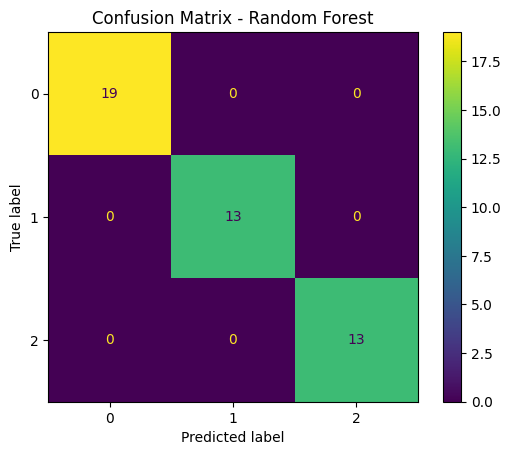

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset
X, y = load_iris(return_X_y=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create base classifiers
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression())
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the model
stacking_clf.fit(X_train, y_train)

# Evaluate accuracy
stacking_acc = accuracy_score(y_test, stacking_clf.predict(X_test))
print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


Stacking Classifier Accuracy: 1.0000


In [48]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Random Forest model
rf_clf = RandomForestClassifier()

# Train the model
rf_clf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf_clf.feature_importances_, index=load_iris().feature_names)
top_5_features = feature_importances.nlargest(5)
print("Top 5 most important features:")
print(top_5_features)


Top 5 most important features:
petal width (cm)     0.444451
petal length (cm)    0.437237
sepal length (cm)    0.084609
sepal width (cm)     0.033703
dtype: float64


In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Bagging classifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

# Train the model
bag_clf.fit(X_train, y_train)

# Predict
y_pred = bag_clf.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [50]:
# Trying different max_depth values
max_depth_values = [5, 10, 15, 20, None]
for depth in max_depth_values:
    rf_clf = RandomForestClassifier(max_depth=depth)
    rf_clf.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
    print(f"Random Forest Accuracy with max_depth={depth}: {rf_acc:.4f}")


Random Forest Accuracy with max_depth=5: 1.0000
Random Forest Accuracy with max_depth=10: 1.0000
Random Forest Accuracy with max_depth=15: 1.0000
Random Forest Accuracy with max_depth=20: 1.0000
Random Forest Accuracy with max_depth=None: 1.0000


In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Regressor with Bagging
bag_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50)
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)

# K Neighbors Regressor with Bagging
bag_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50)
bag_knn.fit(X_train, y_train)
y_pred_knn = bag_knn.predict(X_test)

# Evaluate performance using Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Bagging Regressor with Decision Tree MSE: {mse_dt:.4f}")
print(f"Bagging Regressor with KNN MSE: {mse_knn:.4f}")


Bagging Regressor with Decision Tree MSE: 0.2567
Bagging Regressor with KNN MSE: 1.1030


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model (for regression)
rf_reg = RandomForestRegressor()

# Train the model
rf_reg.fit(X_train, y_train)

# Predict values for evaluation
y_pred = rf_reg.predict(X_test)

# In the case of regression, ROC-AUC is not suitable as it's meant for classification tasks.
# However, you can evaluate the model using R^2 score, Mean Squared Error, or other regression metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance using R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest R^2 Score: {r2:.4f}")
print(f"Random Forest Mean Squared Error: {mse:.4f}")


Random Forest R^2 Score: 0.8072
Random Forest Mean Squared Error: 0.2530


In [14]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Create regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVR
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MAE
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (MAE): 49.839098363276364


In [58]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Bagging Regressor with Decision Tree as base estimator
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50)

# Cross-validation performance
cv_scores = cross_val_score(bag_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean of the cross-validation scores
mean_cv_score = -cv_scores.mean()  # Since it's negative MSE, we negate it
print(f"Bagging Regressor Cross-Validation MSE: {mean_cv_score:.4f}")


Bagging Regressor Cross-Validation MSE: 0.4349


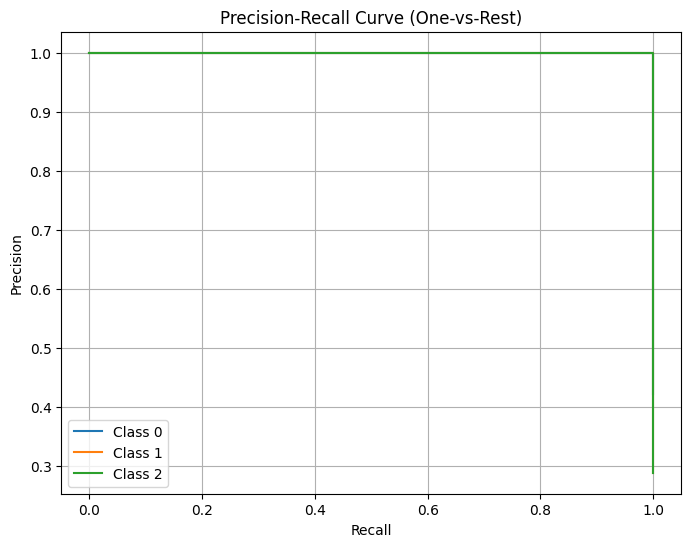

In [65]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Binarize target labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# One-vs-Rest with Random Forest
ovr_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_clf.fit(X_train, y_train)

# Predict probabilities for each class
y_score = ovr_clf.predict_proba(X_test)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(y_score.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
from sklearn.multiclass import OneVsRestClassifier

multi_label_model = OneVsRestClassifier(
    StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
)

multi_label_model.fit(X_train, y_train)


OneVsRestClassifier(estimator=StackingClassifier(estimators=[('rf',
                                                              RandomForestClassifier()),
                                                             ('lr',
                                                              LogisticRegression())],
                                                 final_estimator=LogisticRegression()))

In [69]:
# Bagging Regressor with different bootstrap samples
bootstrap_samples = [True, False]
for bootstrap in bootstrap_samples:
    bag_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap)
    bag_regressor.fit(X_train, y_train)
    y_pred = bag_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor (Bootstrap={bootstrap}) MSE: {mse:.4f}")


Bagging Regressor (Bootstrap=True) MSE: 0.0005
Bagging Regressor (Bootstrap=False) MSE: 0.0000
